In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/telecom_customer_churn.csv")

In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.shape

(7043, 38)

Checking the missing data in file

In [ ]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

Exploratory data analysis to get relevant information from data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#histogram is used to plot the numerical columns in the data set
#plotting multiple numerical columns at once
numerical = ['Age', 'Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa82d863850>,
      dtype=object)

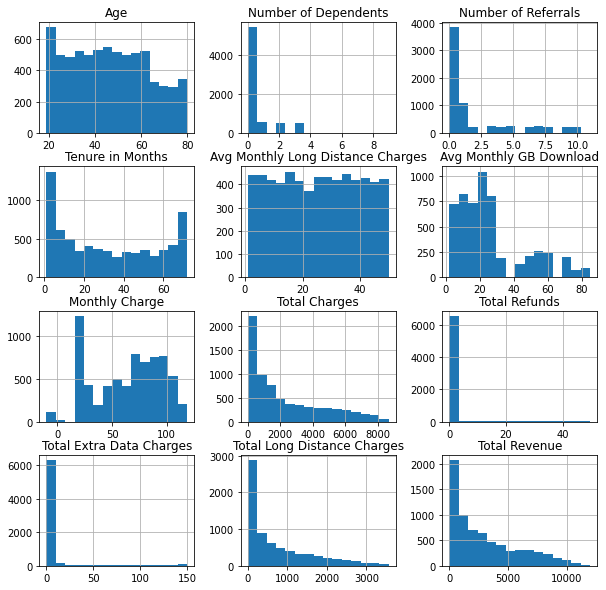

In [ ]:
df[numerical].hist(bins = 15, figsize = (10,10))

In [ ]:
#Plotting categorical columns
category = ['Gender','Married','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security'
,'Online Backup'                         
,'Device Protection Plan'                
,'Premium Tech Support'                  
,'Streaming TV'
,'Streaming Movies'
,'Streaming Music'                      
,'Unlimited Data'
,'Contract'
,'Paperless Billing'
,'Payment Method'
,'Customer Status'
,'Churn Category'
,'Churn Reason']

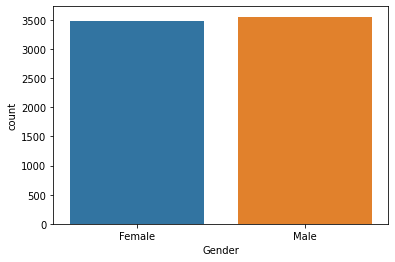

In [ ]:
#for categorical columns we use count plots
#to plot single column through sns
sns.countplot(x = 'Gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

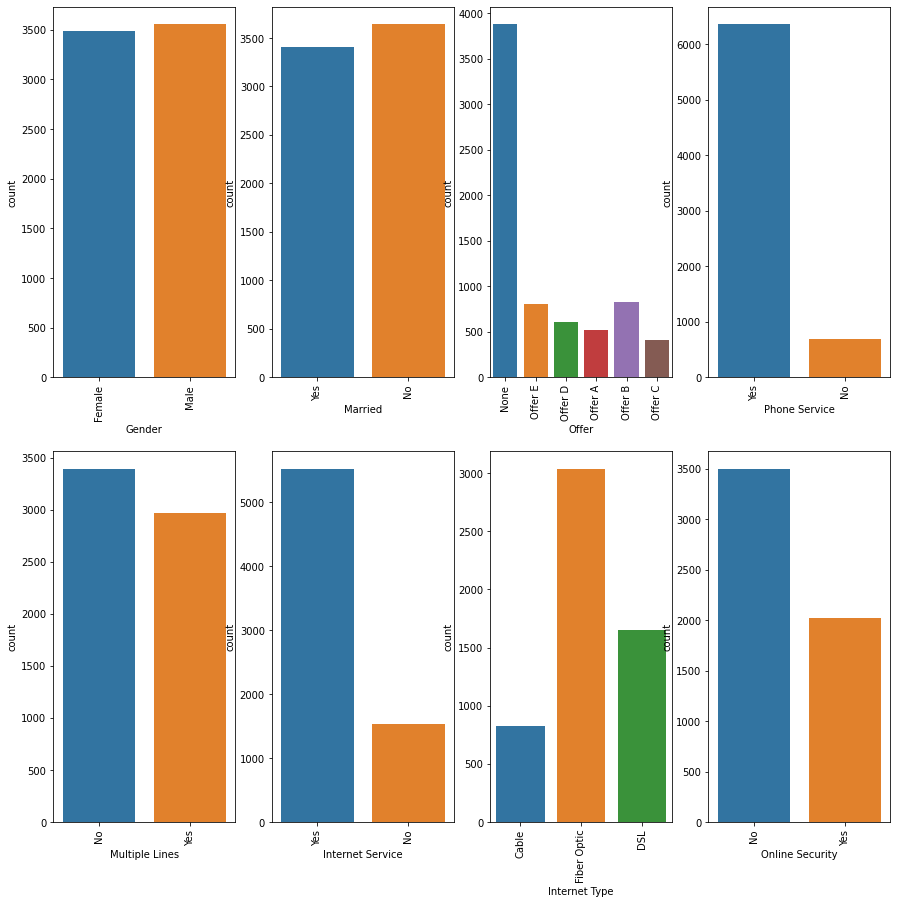

In [ ]:
#For plotting multiple category columns at once
fig, ax = plt.subplots(2,4,figsize = (15,15))
for variable, subplot in zip(category, ax.flatten()):
  sns.countplot(df[variable], ax = subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)

1.plotting boxplots with numerical columns & 'Customer Status' col in dataset

2.box plots are used to plot relationship between numerical and categorical columns

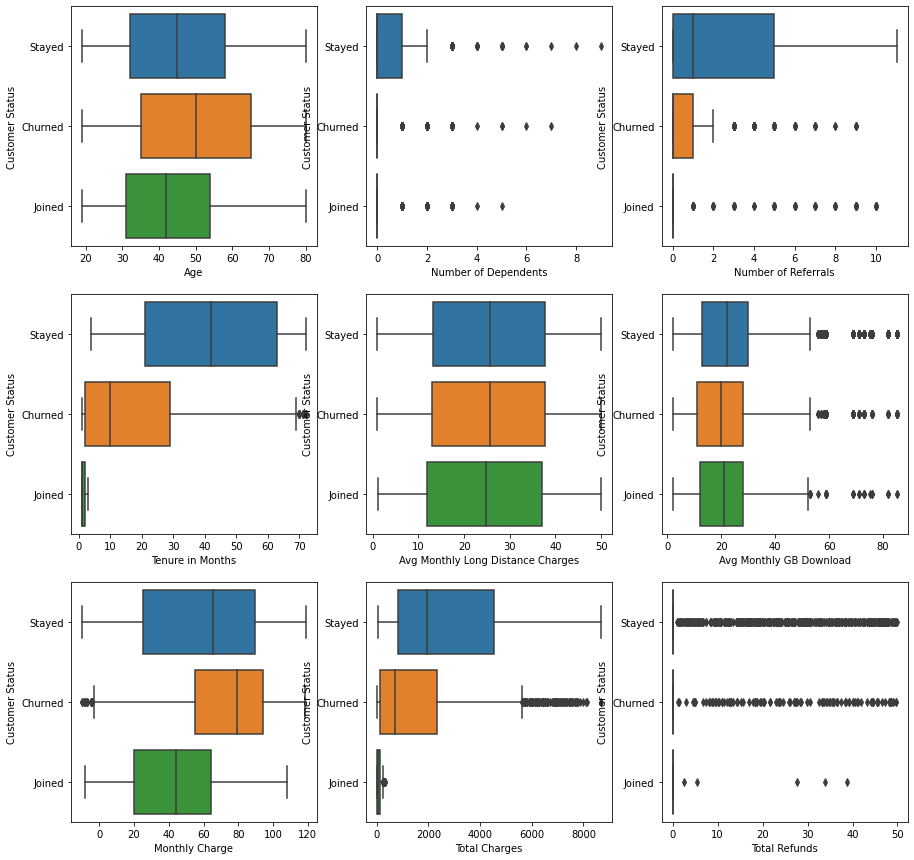

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x = var, y = 'Customer Status', data = df, ax = subplot)

Plotting correlation plot to see correlation between indeoendent variables

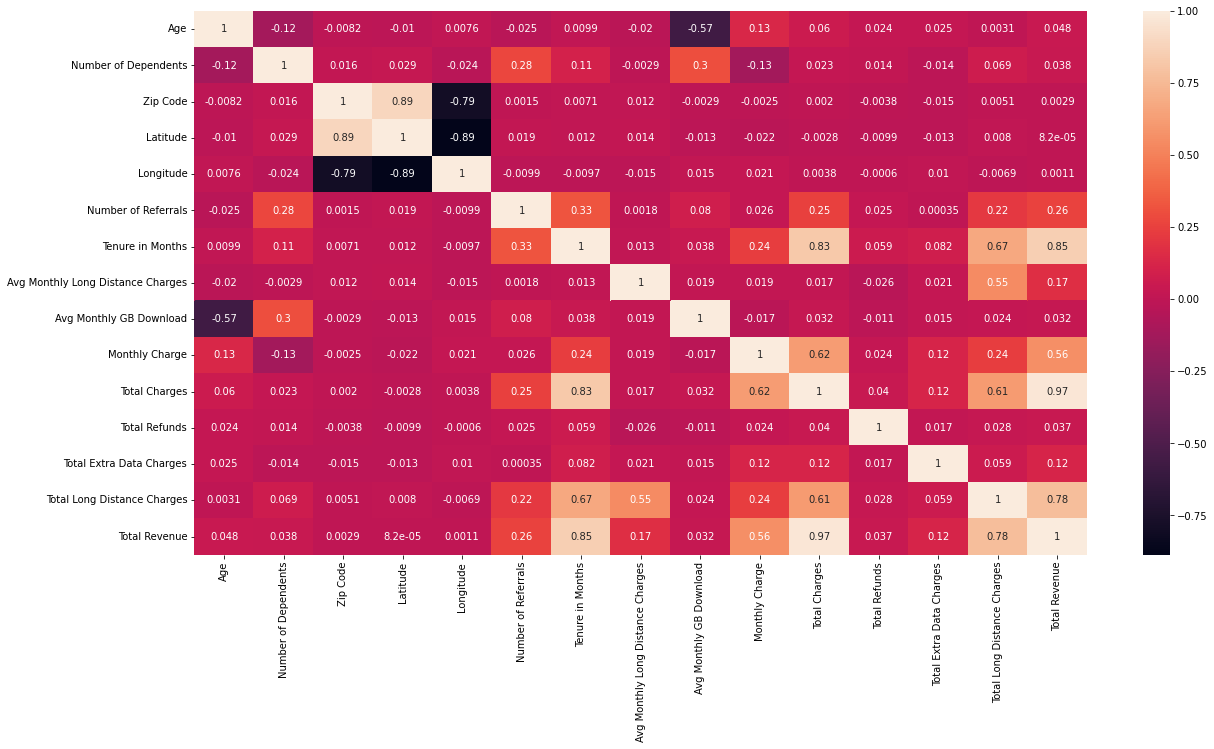

In [ ]:
data  = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

Data Preprocessing

In [ ]:
#The ID column is not much insightful 
df.drop('Customer ID',axis = 1, inplace = True)

In [ ]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [ ]:
df['Married'].value_counts()

No     3641
Yes    3402
Name: Married, dtype: int64

In [ ]:
df['Churn Reason'].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

In [ ]:
df['Churn Category'].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

In [ ]:
df['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [ ]:
#Since gender and maried column has only two subtypes we will replace string values to integer
df['Gender'] = [1 if each == 'Female' else 0 for each in df['Gender']]
df['Married'] = [1 if each == 'Yes' else 0 for each in df['Married']]

For columns having more than two categories we will use map function to change values

In [ ]:
df['Churn Category'] = df['Churn Category'].map({'Competitor':1
,'Dissatisfaction':2
,'Attitude':3
,'Price':4
,'Other':5})

In [ ]:
df['Payment Method'] = df['Payment Method'].map({'Bank Withdrawal':1
,'Credit Card':2
,'Mailed Check':3})

In [ ]:
df['Churn Reason'].unique()
#Copy all the unique categories from here and paste it in the map function + asign each category an int value 

array([nan, 'Competitor had better devices', 'Product dissatisfaction',
       'Network reliability', 'Limited range of services',
       'Competitor made better offer', "Don't know",
       'Long distance charges', 'Attitude of service provider',
       'Attitude of support person',
       'Competitor offered higher download speeds',
       'Competitor offered more data',
       'Lack of affordable download/upload speed', 'Deceased', 'Moved',
       'Service dissatisfaction', 'Price too high',
       'Lack of self-service on Website',
       'Poor expertise of online support', 'Extra data charges',
       'Poor expertise of phone support'], dtype=object)

In [ ]:
df['Churn Reason'] = df['Churn Reason'].map({'Competitor had better devices':1, 'Product dissatisfaction':2,
       'Network reliability':3, 'Limited range of services':4,
       'Competitor made better offer':5, "Don't know":6,
       'Long distance charges':7, 'Attitude of service provider':8,
       'Attitude of support person':9,
       'Competitor offered higher download speeds':10,
       'Competitor offered more data':11,
       'Lack of affordable download/upload speed':12, 'Deceased':13, 'Moved':14,
       'Service dissatisfaction':15, 'Price too high':16,
       'Lack of self-service on Website':17,
       'Poor expertise of online support':18, 'Extra data charges':19,
       'Poor expertise of phone support':20})

In [ ]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [ ]:
df['Customer Status'] = df['Customer Status'].map({'Stayed':1
,'Churned':2
,'Joined':3})

In [ ]:
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,1,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,2,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0,46,0,0,Glendale,91206,34.162515,-118.203869,0,9,...,2,-4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,1,73.9,280.85,0.00,0,134.60,415.45,2,1.0,1.0
3,0,78,1,0,Martinez,94553,38.014457,-122.115432,1,13,...,1,98.0,1237.85,0.00,0,361.66,1599.51,2,2.0,2.0
4,1,75,1,0,Camarillo,93010,34.227846,-119.079903,3,3,...,2,83.9,267.40,0.00,0,22.14,289.54,2,2.0,3.0


In [ ]:
df.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming 

There are a still lot of columns which has data type object -> which means that all these columns need to be transformed

note -  Some classification model handels data efficiently even without label encoding like Decison Trees or Rnadom Forest, but models like SVM and KNN are sensitive to null values, outliers and even string data type. 
So data transformation is rather an important step that can't be overlooked.

In [ ]:
df['Phone Service'] = [1 if each == 'Yes' else 0 for each in df['Phone Service']]
df['Multiple Lines'] = [1 if each == 'Yes' else 0 for each in df['Multiple Lines']]
df['Internet Service'] = [1 if each == 'Yes' else 0 for each in df['Internet Service']]
df['Internet Type'] = [1 if each == 'Yes' else 0 for each in df['Internet Type']]
df['Online Security'] = [1 if each == 'Yes' else 0 for each in df['Online Security']]
df['Online Backup'] = [1 if each == 'Yes' else 0 for each in df['Online Backup']]
df['Device Protection Plan'] = [1 if each == 'Yes' else 0 for each in df['Device Protection Plan']]
df['Premium Tech Support'] = [1 if each == 'Yes' else 0 for each in df['Premium Tech Support']]
df['Streaming TV'] = [1 if each == 'Yes' else 0 for each in df['Streaming TV']]
df['Streaming Movies'] = [1 if each == 'Yes' else 0 for each in df['Streaming Movies']]
df['Streaming Music'] = [1 if each == 'Yes' else 0 for each in df['Streaming Music']]
df['Unlimited Data'] = [1 if each == 'Yes' else 0 for each in df['Unlimited Data']]
df['Paperless Billing'] = [1 if each == 'Yes' else 0 for each in df['Paperless Billing']]

In [ ]:
#Contract column has more than two sub-categories
df['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [ ]:
df['Contract'] = df['Contract'].map({'One Year':1, 'Month-to-Month':2, 'Two Year':3})

In [ ]:
df['Offer'].unique()

array(['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [ ]:
df['Offer'] = df['Offer'].map({'None':0, 'Offer E':1, 'Offer D':2, 'Offer A':3, 'Offer B':4, 'Offer C':5})

In [ ]:
#Let's Check if the data has been preprocessed completely
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,1,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,2,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0,46,0,0,Glendale,91206,34.162515,-118.203869,0,9,...,2,-4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,1,73.9,280.85,0.00,0,134.60,415.45,2,1.0,1.0
3,0,78,1,0,Martinez,94553,38.014457,-122.115432,1,13,...,1,98.0,1237.85,0.00,0,361.66,1599.51,2,2.0,2.0
4,1,75,1,0,Camarillo,93010,34.227846,-119.079903,3,3,...,2,83.9,267.40,0.00,0,22.14,289.54,2,2.0,3.0


In [ ]:
df.dtypes

Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                          int64
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming 

There are 682 missing values in avg monthly long distance charges and 1562 in avg monthly GB downloads.

In [ ]:
# filling the null values with the mean
value = df['Avg Monthly Long Distance Charges'].mean()
values = df['Avg Monthly GB Download'].mean()
val1 = df['Churn Category'].mean()
val2 = df['Churn Reason'].mean()

In [ ]:
df['Avg Monthly Long Distance Charges'].fillna(value = value, inplace = True)

In [ ]:
df['Avg Monthly GB Download'].fillna(value = values, inplace = True)

In [ ]:
df['Churn Category'].fillna(value = val1, inplace = True)

In [ ]:
df['Churn Reason'].fillna(value = val2, inplace = True)

In [ ]:
#lets check if the null values were filled
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [ ]:
df.head(5)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,1,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,2,65.6,593.30,0.00,0,381.51,974.81,1,2.235955,7.458534
1,0,46,0,0,Glendale,91206,34.162515,-118.203869,0,9,...,2,-4.0,542.40,38.33,10,96.21,610.28,1,2.235955,7.458534
2,0,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,1,73.9,280.85,0.00,0,134.60,415.45,2,1.000000,1.000000
3,0,78,1,0,Martinez,94553,38.014457,-122.115432,1,13,...,1,98.0,1237.85,0.00,0,361.66,1599.51,2,2.000000,2.000000
4,1,75,1,0,Camarillo,93010,34.227846,-119.079903,3,3,...,2,83.9,267.40,0.00,0,22.14,289.54,2,2.000000,3.000000


In [ ]:
df.drop('City', axis = 1, inplace = True)

In [ ]:
x = df.drop('Customer Status', axis = 1)

In [ ]:
x.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason
0,1,37,1,0,93225,34.827662,-118.999073,2,9,0,...,1,2,65.6,593.30,0.00,0,381.51,974.81,2.235955,7.458534
1,0,46,0,0,91206,34.162515,-118.203869,0,9,0,...,0,2,-4.0,542.40,38.33,10,96.21,610.28,2.235955,7.458534
2,0,50,0,0,92627,33.645672,-117.922613,0,4,1,...,1,1,73.9,280.85,0.00,0,134.60,415.45,1.000000,1.000000
3,0,78,1,0,94553,38.014457,-122.115432,1,13,2,...,1,1,98.0,1237.85,0.00,0,361.66,1599.51,2.000000,2.000000
4,1,75,1,0,93010,34.227846,-119.079903,3,3,0,...,1,2,83.9,267.40,0.00,0,22.14,289.54,2.000000,3.000000


In [ ]:
y = df['Customer Status'].values

In [ ]:
y

array([1, 1, 2, ..., 3, 1, 1])

Data Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(x)

array([[1.        , 0.29508197, 1.        , ..., 0.07973337, 0.30898876,
        0.33992284],
       [0.        , 0.44262295, 0.        , ..., 0.04924912, 0.30898876,
        0.33992284],
       [0.        , 0.50819672, 0.        , ..., 0.03295624, 0.        ,
        0.        ],
       ...,
       [0.        , 0.04918033, 0.        , ..., 0.00908431, 0.30898876,
        0.33992284],
       [0.        , 0.03278689, 1.        , ..., 0.39708462, 0.30898876,
        0.33992284],
       [0.        , 0.27868852, 1.        , ..., 0.30826611, 0.30898876,
        0.33992284]])

In [ ]:
X = scaler.fit_transform(x)

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Model Building

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred)*100)

83.00993847610033


Applying Decision Tree, Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rmf = RandomForestClassifier()

In [ ]:
rmf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_prediction = rmf.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_prediction)*100)

100.0


Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predd = DT.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_predd)*100)

100.0


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC = KNeighborsClassifier()

In [ ]:
KNC.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pre = KNC.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pre)*100)

73.68670137245623
